# RQ2 Analysis
This notebook contains the analysis for RQ2. The goal of this analysis is to understand the evolution of the serialization format used in the dataset over the years.

## Select the dataset to analyze

In [51]:
group_under_analysis = 'recent' # change this to 'legacy' or 'recent' to analyze the corresponding dataset

## Load the data

In [52]:
from scripts.notebooks.nb_utils import read_repositories_evolution

# model files per repository and the elapsed days between the commit and safetensors' release date
df = read_repositories_evolution(group_under_analysis)
df['year'] = df['date'].dt.year
df['year'] = df['year'].astype(int) # set year as an integer
# find the last commit hash per repository per year
df_last_hash = df.sort_values('date').drop_duplicates(['repo_url', 'year'], keep='last')
df_last_hash = df_last_hash[['repo_url', 'year', 'commit_hash', 'date']]

# filter df such that it  only keeps the rows in df if the commit hash is the last commit hash in the repository URL
df = df.merge(df_last_hash, on=['repo_url', 'year', 'date', 'commit_hash'], how='inner')
"Min date", df['date'].min(),"Max date",  df['date'].max()

100%|██████████| 527512/527512 [00:37<00:00, 13913.74commit/s]


('Min date',
 Timestamp('2022-09-22 04:42:25'),
 'Max date',
 Timestamp('2024-12-31 12:30:54'))

In [53]:
df

,repo_url,commit_hash,model_file_path,serialization_format,message,author,date,is_in_commit,elapsed_days,change_status,year
0,SidXXD/Pattern_d_0.60_Man_1_Eps_8,9b2be96bb789b1aff091e8ba8e41a5fbeb2705c1,SidXXD/Pattern_d_0.60_Man_1_Eps_8/<v1*>.bin,torch.save,End of training,XideXu,2024-10-23 05:14:58,True,762,*,2024
1,SidXXD/Pattern_d_0.60_Man_1_Eps_8,9b2be96bb789b1aff091e8ba8e41a5fbeb2705c1,SidXXD/Pattern_d_0.60_Man_1_Eps_8/pytorch_cust...,torch.save,End of training,XideXu,2024-10-23 05:14:58,True,762,*,2024
2,SidXXD/Pattern_d_0.60_Man_1_Eps_8,9b2be96bb789b1aff091e8ba8e41a5fbeb2705c1,SidXXD/Pattern_d_0.60_Man_1_Eps_8/checkpoint-2...,torch.save,End of training,XideXu,2024-10-23 05:14:58,True,762,*,2024
3,SidXXD/Pattern_d_0.60_Man_1_Eps_8,9b2be96bb789b1aff091e8ba8e41a5fbeb2705c1,SidXXD/Pattern_d_0.60_Man_1_Eps_8/checkpoint-2...,safetensors,End of training,XideXu,2024-10-23 05:14:58,True,762,*,2024
4,SidXXD/Pattern_d_0.60_Man_1_Eps_8,9b2be96bb789b1aff091e8ba8e41a5fbeb2705c1,SidXXD/Pattern_d_0.60_Man_1_Eps_8/checkpoint-2...,safetensors,End of training,XideXu,2024-10-23 05:14:58,True,762,*,2024
...,...,...,...,...,...,...,...,...,...,...,...
26830,jjglilleberg/xlm-roberta-base-finetuned-panx-de,c3093e3482779b864ae6a48fa7edbae69224a197,jjglilleberg/xlm-roberta-base-finetuned-panx-d...,torch.save,Training completed!,Joseph Lilleberg,2024-04-05 22:55:08,False,561,,2024
26831,jjglilleberg/xlm-roberta-base-finetuned-panx-de,c3093e3482779b864ae6a48fa7edbae69224a197,jjglilleberg/xlm-roberta-base-finetuned-panx-d...,ONNX,Training completed!,Joseph Lilleberg,2024-04-05 22:55:08,True,561,+,2024
26832,jjglilleberg/xlm-roberta-base-finetuned-panx-de,c3093e3482779b864ae6a48fa7edbae69224a197,jjglilleberg/xlm-roberta-base-finetuned-panx-d...,torch.save,Training completed!,Joseph Lilleberg,2024-04-05 22:55:08,True,561,*,2024
26833,jjglilleberg/xlm-roberta-base-finetuned-panx-de,d02965be0b30a07deff622abd718164aef684ce9,jjglilleberg/xlm-roberta-base-finetuned-panx-d...,torch.save,Training completed!,Joseph Lilleberg,2022-12-22 16:10:33,True,91,+,2022


## Visualization of serialization format distribution over the years

In [54]:
title_suffix = f'({group_under_analysis.capitalize()} Repositories)' if group_under_analysis != 'both' else '(All Repositories)'
fig_dimensions = (10, 4) if group_under_analysis != 'recent' else (5, 4)

### Stacked Bar Chart

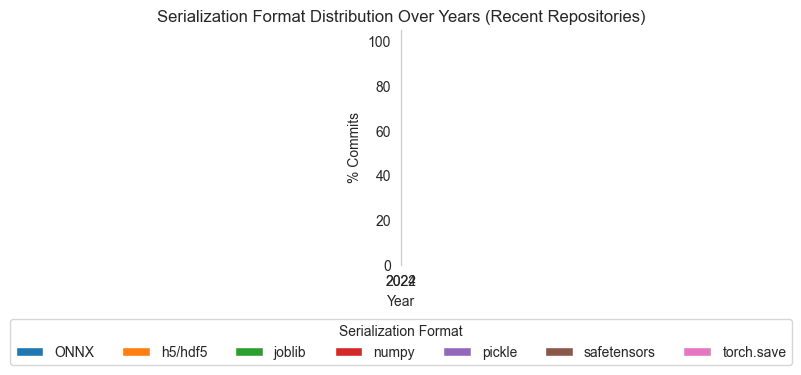

In [55]:
from nb_utils import RESULTS_DIR
import matplotlib.pyplot as plt
import numpy as np
# Sample dataqa
df = df[df['serialization_format'] != 'undetermined']
# Compute a slice of the DataFrame with the relevant columns
df_by_date = df[['year', 'serialization_format']]


# Group by year and serialization format, then count occurrences
grouped = df_by_date.groupby(['year', 'serialization_format']).size().unstack(fill_value=0)

# Normalize the values to 100%
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=fig_dimensions) # Set the figure size based on the group under analysis

# Cumulative values for stacked bars
cumulative_values = np.zeros(len(grouped_percentage))

for serialization_format in grouped_percentage.columns:
    ax.bar(grouped_percentage.index, grouped_percentage[serialization_format], 
           bottom=cumulative_values, label=serialization_format)
    cumulative_values += grouped_percentage[serialization_format]

# Add labels and title
ax.set_ylabel('% Commits')
ax.set_xlabel('Year')
ax.set_title(f'Serialization Format Distribution Over Years {title_suffix}')
# Move the legend outside  the plot
ax.legend(title='Serialization Format', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=7)
# Adjust the plot layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# save as pdf
plt.savefig(RESULTS_DIR/f'RQ2FormatsStacked_{group_under_analysis}.pdf', format='pdf', bbox_inches='tight')
plt.show()


### Line Chart

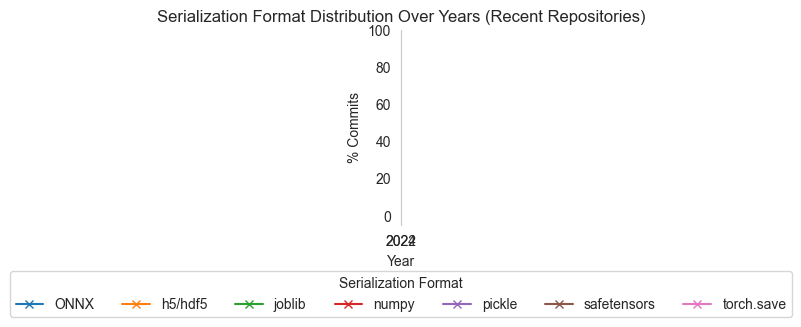

In [56]:
from nb_utils import RESULTS_DIR
import matplotlib.pyplot as plt


# Group by year and serialization format, then count occurrences
grouped = df.groupby(['year', 'serialization_format']).size().unstack(fill_value=0)

# Normalize the values to 100%
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the line chart
fig, ax = plt.subplots(figsize=fig_dimensions)  # Set the figure size based on the group under analysis
# make y-axis range from 0 to 100
ax.set_ylim(-5, 100)

# Plot lines for each serialization format
for serialization_format in grouped_percentage.columns:
    ax.plot(grouped_percentage.index, grouped_percentage[serialization_format], marker='x', label=serialization_format)

# Add labels and title
ax.set_ylabel('% Commits')
ax.set_xlabel('Year')
ax.set_title(f'Serialization Format Distribution Over Years {title_suffix}')
# Move the legend outside  the plot
ax.legend(title='Serialization Format',  bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=7)

# Adjust the plot layout to make room for the legend
plt.tight_layout(rect=[0, 0.1, 0.85, 1])  # Adjust the rectangle to fit the legend

# save as pdf
plt.savefig(RESULTS_DIR / f'RQ2FormatsDistribution_{group_under_analysis}.pdf', format='pdf', bbox_inches='tight')

plt.show()

### Line Chart with Counts

import matplotlib.pyplot as plt


# Filter out rows with 'undetermined' serialization format
filtered_df = df[df['serialization_format'] != 'undetermined']
# Group by year and serialization format, then count occurrences
grouped_counts = filtered_df.groupby(['year', 'serialization_format']).size().unstack(fill_value=0)

# Set the size of the figure (width, height)
fig, ax = plt.subplots(figsize=fig_dimensions)  # Set the figure size based on the group under analysis

# Plot the line chart with counts
for serialization_format in grouped_counts.columns:
    ax.plot(grouped_counts.index, grouped_counts[serialization_format], marker='x', label=serialization_format)

# Add labels and title
ax.set_ylabel('# Model Files')
ax.set_xlabel('Year')
ax.set_title(f'Serialization Format Cumulative Totals Over Years {title_suffix}')

# Move the legend outside of the plot
ax.legend(title='Serialization Format',  bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=6)

# Adjust the plot layout to make room for the legend
plt.tight_layout(rect=[0, 0.3, 0.85, 1])

plt.show()


### Visualization monthly

import pandas as pd
from scripts.notebooks.nb_utils import read_repositories_evolution
# Load the CSV file
df = read_repositories_evolution(group_under_analysis)


# Display the first few rows to understand the structure of the data
df.head()
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month-year period for grouping
df['month'] = df['date'].dt.to_period('M')

# Sort by date to identify the last commit within each group
df = df.sort_values(by=['repo_url', 'month', 'date'])

# Select the last commit for each repository within each month
last_commit_df = df.groupby(['repo_url', 'month']).last().reset_index()

# Count the occurrences of each serialization format per month
serialization_distribution = last_commit_df.groupby(['month', 'serialization_format']).size().unstack(fill_value=0)

# Plotting the distribution using a line chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
serialization_distribution.plot(kind='line', marker='x', figsize=(14, 7))
plt.title('Monthly Distribution of Serialization Formats (Last Commit per Repo) ' + title_suffix)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Serialization Format')
plt.tight_layout()
plt.show()


# Calculate the percentage distribution instead of raw counts
serialization_percentage_distribution = serialization_distribution.div(serialization_distribution.sum(axis=1), axis=0) * 100
# Exclude 'undetermined' serialization format
serialization_percentage_distribution = serialization_percentage_distribution.drop(columns=['undetermined'], errors='ignore')


# # Plotting the percentage distribution using a line chart
# plt.figure(figsize=(12, 6))
# serialization_percentage_distribution.plot(kind='line', marker='x', figsize=(14, 7))
# plt.title('Monthly Percentage Distribution of Serialization Formats (Last Commit per Repo)')
# plt.xlabel('Month')
# plt.ylabel('Percentage')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend(title='Serialization Format')
# plt.tight_layout()
# plt.show()

# Plotting the modified chart
plt.figure(figsize=(12, 6))
ax = serialization_percentage_distribution.plot(kind='line', marker='x', figsize=(14, 7))

plt.title('Monthly Percentage Distribution of Serialization Formats (Last Commit per Repo)')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True)

# Move the legend outside the plot
plt.legend(title='Serialization Format', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=6)
plt.tight_layout()
plt.show()
